In [49]:
import pandas as pd
df=pd.read_csv("data/Telco_Cusomer_Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [50]:
df.shape

(7043, 21)

In [51]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [52]:
df["TotalCharges"].unique()[:20]

array(['29.85', '1889.5', '108.15', '1840.75', '151.65', '820.5',
       '1949.4', '301.9', '3046.05', '3487.95', '587.45', '326.8',
       '5681.1', '5036.3', '2686.05', '7895.15', '1022.95', '7382.25',
       '528.35', '1862.9'], dtype=object)

In [53]:
df["TotalCharges"].str.strip().eq("").sum()
df[df["TotalCharges"].str.strip().eq("")]
df=df.drop("customerID",axis=1)

In [54]:
df["TotalCharges"]=pd.to_numeric(df["TotalCharges"],errors="coerce")
df["TotalCharges"]=df["TotalCharges"].fillna(0)
df["TotalCharges"].isnull().sum()



np.int64(0)

In [55]:
x=df.drop("Churn",axis=1)
y=df["Churn"]
y=y.map({"No":0,"Yes":1})
df["Churn"].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [56]:
df.select_dtypes(include="object").columns
x=pd.get_dummies(x,drop_first="True")
x.shape

(7043, 30)

In [63]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,
                                               test_size=0.2,
                                               random_state=42,
                                               stratify=y)

In [66]:
x_train.shape

(5634, 30)

In [67]:
x_test.shape

(1409, 30)

In [73]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [83]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=1000,class_weight="balanced")
model.fit(x_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [84]:
from sklearn.metrics import classification_report
y_pred=model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1035
           1       0.51      0.79      0.62       374

    accuracy                           0.74      1409
   macro avg       0.71      0.75      0.71      1409
weighted avg       0.80      0.74      0.75      1409



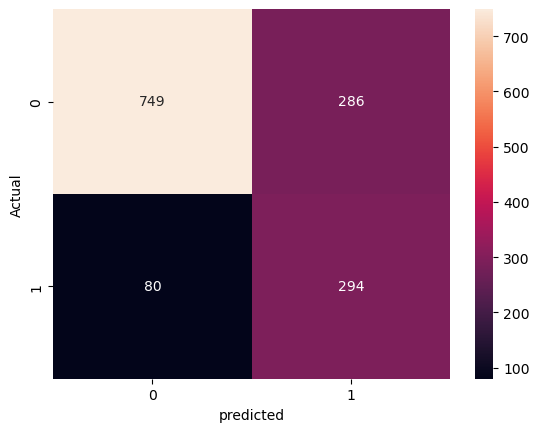

In [86]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel("predicted")
plt.ylabel("Actual")
plt.show()

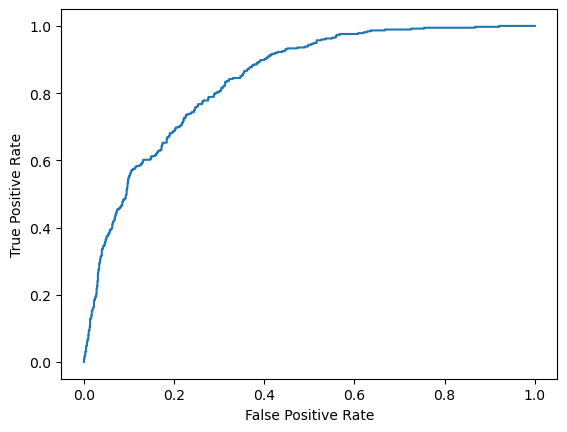

AUC: 0.8414012245214291


In [89]:
from sklearn.metrics import roc_curve,roc_auc_score
y_prob=model.predict_proba(x_test)[:,1]
fpr,tpr,threeshold=roc_curve(y_test,y_prob)
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()
print("AUC:",roc_auc_score(y_test,y_prob))

In [93]:
importance=pd.Series(model.coef_[0],index=x.columns)
importance.sort_values(ascending=False).head(10)

InternetService_Fiber optic       0.808897
TotalCharges                      0.494748
StreamingMovies_Yes               0.285948
StreamingTV_Yes                   0.273209
MultipleLines_Yes                 0.201165
PaymentMethod_Electronic check    0.188783
PaperlessBilling_Yes              0.164703
DeviceProtection_Yes              0.058287
SeniorCitizen                     0.056636
PhoneService_Yes                  0.024336
dtype: float64